<a href="https://colab.research.google.com/github/afullhart/climateanalogs/blob/main/Figures/3D_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset -f

In [2]:
!pip install rioxarray --quiet
!pip install -U kaleido
!pip install --upgrade "plotly[kaleido]"
!pip install -q condacolab
!pip install --upgrade plotly
import condacolab
condacolab.install()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 67.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:07
🔁 Restarting kernel...


In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
!conda install -c plotly python-kaleido


Channels:
 - plotly
 - conda-forge
Platform: linux-64
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - python-kaleido


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2026.2.25  |       hbd8a1cb_0         144 KB  conda-forge
    certifi-2026.2.25          |     pyhd8ed1ab_0         148 KB  conda-forge
    choreographer-1.2.1        |     pyhcf101f3_0          42 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    exceptiongroup-1.3.1       |     pyhd8ed1ab_0          21 KB  conda-forge
    iniconfig-2.3.0            |     pyhd8ed1ab_0          13 KB  conda-forge
    logistro-2.0.1             |     pyhcf101f3_0          15 KB  conda-forge
    openssl-3.6.1              |       h35e630c_1         3.0 MB  conda-forge
    orjson-3.11.7              |  p

In [3]:
!sudo apt update && sudo apt-get install libnss3 libatk-bridge2.0-0 libcups2 libxcomposite1 libxdamage1 libxfixes3 libxrandr2 libgbm1 libxkbcommon0 libpango-1.0-0 libcairo2 libasound2

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [85.0 kB]
Get:7 https://cli.github.com/packages stable/main amd64 Packages [357 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,912 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,783 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [62.6 k

In [7]:
import kaleido


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
selection = 'ZO' #ZS OR ZO
if selection == 'ZS':
  components = 12
else:
  components = 8

isof = '/content/drive/My Drive/Colab Notebooks/Analogs/IsoCluster_{}.tif'.format(selection)
projf = '/content/drive/My Drive/Colab Notebooks/Analogs'
multf = '/content/drive/My Drive/Colab Notebooks/Analogs/MultidimRasterLyr_d_pc_{}.tif'.format(selection)
zonalf = '/content/drive/My Drive/Colab Notebooks/Analogs/Zonal/Zonal_tavg.csv'
fld3 = '/content/drive/My Drive/Colab Notebooks/Analogs/Zonal_{}/Zonal3_Test'.format(selection)
fld4 = '/content/drive/My Drive/Colab Notebooks/Analogs/Zonal_{}/Zonal4_Test'.format(selection)
fldM = '/content/drive/My Drive/Colab Notebooks/Analogs/Zonal_{}/ZonalM_Test'.format(selection)


### Static 3d plot

(1281, 2042)
(1623570, 8)
(1623570,)
[[ 1.36961901e+00  2.47369956e-01 -1.47652796e-01 ... -1.74906219e-01
  -2.17523974e-02 -1.52261730e-01]
 [ 1.35855845e+00  3.40448979e-01 -8.86942032e-02 ...  1.46884616e-03
   1.37730773e-01  9.86333796e-02]
 [ 1.49716513e+00  6.59659771e-02 -2.22356459e-01 ...  5.61956441e-02
  -5.95402352e-03  3.32303401e-02]
 ...
 [ 1.38875170e+00  1.06573344e-01  2.45514987e-01 ... -4.51040958e-02
   2.44855399e-03 -3.73039482e-02]
 [ 1.57255020e+00  6.44243212e-01 -2.59520515e-01 ...  7.55123873e-02
  -1.30519903e-01  1.24208919e-01]
 [ 1.52776052e+00  5.29106928e-01 -5.51931294e-03 ...  1.23539977e-01
  -3.10989626e-02 -1.37176881e-01]]


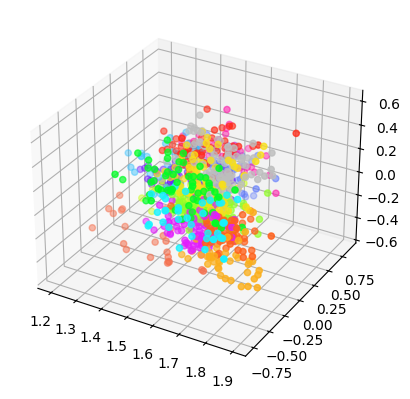

In [46]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray as rx
import os

colors = ['#91FE28', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#BDBEBE', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']

df = pd.read_csv(zonalf)
df.index.name = 'arc_id'
df['tavg'] = df['MEAN']
df['color'] = colors
temp_order_df = df.sort_values(by='tavg', ascending=False)
df = temp_order_df.reset_index()
colors = df['color']
custom_grad = LinearSegmentedColormap.from_list('my_gradient', colors, N=15)


iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(multf)
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
filtered_arr = arr[0, :, :][mask]
cluster_labels = filtered_arr

print(X.shape)
print(cluster_labels.shape)

rng = np.random.default_rng(seed=123)
rnd_idxs = rng.choice(list(range(X.shape[0])), size=1000)
X_sample = X[rnd_idxs]
cluster_label_sample = cluster_labels[rnd_idxs]

print(X_sample)

pca1 = X_sample[:,0]
pca2 = X_sample[:,1]
pca3 = X_sample[:,2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(pca1, pca2, pca3, c=cluster_label_sample, cmap=custom_grad)

plt.show()


### Interactive 3d plot

In [47]:
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import rioxarray as rx
import os

colors = ['#91FE28', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#BDBEBE', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
custom_grad = LinearSegmentedColormap.from_list('my_gradient', colors, N=15)

colors = ['#91FE28', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#BDBEBE', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
cmap = mcolors.ListedColormap(colors)

df = pd.read_csv(zonalf)
df.index.name = 'arc_id'
df['tavg'] = df['MEAN']
df['color'] = colors
temp_order_df = df.sort_values(by='tavg', ascending=False)
df = temp_order_df.reset_index()
colors = df['color']



iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(multf)
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
filtered_arr = arr[0, :, :][mask]
cluster_labels = filtered_arr

print(X.shape)
print(cluster_labels.shape)

rng = np.random.default_rng(seed=123)
rnd_idxs = rng.choice(list(range(X.shape[0])), size=20000)
X_sample = X[rnd_idxs]
cluster_label_sample = cluster_labels[rnd_idxs]

print(X_sample)

pca1 = X_sample[:,0]
pca2 = X_sample[:,1]
pca3 = X_sample[:,2]

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=pca1, y=pca2, z=pca3, mode='markers',
  marker=dict(size=6, color=cluster_label_sample, colorscale=colors, symbol='circle'),
  name='blue'))

fig.show()

fig.write_html('/content/drive/My Drive/Colab Notebooks/Analogs/interactive_plot.html')




(1281, 2042)
(1623570, 8)
(1623570,)
[[ 1.36961901e+00  2.47369956e-01 -1.47652796e-01 ... -1.74906219e-01
  -2.17523974e-02 -1.52261730e-01]
 [ 1.35855845e+00  3.40448979e-01 -8.86942032e-02 ...  1.46884616e-03
   1.37730773e-01  9.86333796e-02]
 [ 1.49716513e+00  6.59659771e-02 -2.22356459e-01 ...  5.61956441e-02
  -5.95402352e-03  3.32303401e-02]
 ...
 [ 1.64917133e+00 -2.14498204e-01 -1.25656246e-01 ... -5.84993581e-02
  -1.75073108e-02  1.27085397e-01]
 [ 1.48427176e+00  2.13322232e-01 -1.50078637e-01 ... -8.50382694e-03
   8.88344813e-02  8.35851436e-02]
 [ 1.70619296e+00 -3.97939890e-02 -1.45631471e-01 ... -1.77812051e-03
  -3.96118873e-02  1.25660483e-02]]


### Calculate outlier percentage

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray as rx
import os

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(multf)
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()

print(X.shape)

thing = X[:,0]
print(thing.shape)

outliers = 0
n = 0
for i in range(X.shape[1]):
  mean = np.mean(X[:,i])
  sdev = np.std(X[:,i])
  l = X[:,i]
  for x in l:
    if x >= mean + (6*sdev) or x <= mean - (6*sdev):
      outliers += 1
    n += 1

print(outliers/n*100.0)
print(n)



(1281, 2042)
(1623570, 8)
(1623570,)
0.010478451806820771
12988560


### Calculate X averages

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray as rx
import os

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(multf)
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()

print(X.shape)

for i in range(X.shape[1]):
  print(np.mean(X[:,i]))

com_im = rx.open_rasterio(os.path.join(projf, 'Extract_Composite.tif'))
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()

print(X.shape)

for i in range(X.shape[1]):
  print(np.mean(X[:,i]))


(1281, 2042)
(1623570, 8)
1.5556262207872213
0.0716147371717792
-0.0075242151236262576
0.04584236530455436
0.030745197433169048
-0.0014150214960988103
9.463283501480162e-05
0.005164192441586609
(1623570, 17)
0.14049549501766176
0.20705724377581536
0.383334249484744
0.40377935045609975
0.07704293105087817
inf
inf
inf
inf
inf
inf
1.1025086691673288e+302
1.1025086691673288e+302
inf
inf
inf
0.48118782044715747


/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning:

overflow encountered in reduce



### Project centroids onto 3d space

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import rioxarray as rx
import os

colors = ['#91FE28', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#BDBEBE', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
custom_grad = LinearSegmentedColormap.from_list('my_gradient', colors, N=15)

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(multf)
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()
print(X.shape)

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
filtered_arr = arr[0, :, :][mask]
cluster_labels = filtered_arr


outliers = 0
n = 0
coords = []
for i in range(15):
  label_idxs = []
  for j in range(len(cluster_labels)):
    if cluster_labels[j] == i + 1:
      label_idxs.append(j)
  print(len(label_idxs))
  label_X = X[label_idxs, :]
  print(label_X.shape)

  centroids = []
  for j in range(8):
    centrd = np.mean(label_X[:,j])
    centroids.append(centrd)

  coords.append(centroids)

print(len(coords))
print(coords)
print(len(coords[0]))


X_sample = np.array(coords)
print(X_sample.shape)

pca1 = X_sample[:,0]
pca2 = X_sample[:,1]
pca3 = X_sample[:,2]

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=pca1, y=pca2, z=pca3, mode='markers',
  marker=dict(size=6, color=list([i+1 for i in range(15)]), colorscale=colors, symbol='circle'),
  name='blue'))

fig.show()

fig.write_html('/content/drive/My Drive/Colab Notebooks/Analogs/interactive_plot.html')



(1281, 2042)
(1623570, 12)
110537
(110537, 12)
63541
(63541, 12)
92773
(92773, 12)
94059
(94059, 12)
132680
(132680, 12)
221345
(221345, 12)
169409
(169409, 12)
94396
(94396, 12)
107256
(107256, 12)
177321
(177321, 12)
91206
(91206, 12)
82189
(82189, 12)
55231
(55231, 12)
42507
(42507, 12)
89120
(89120, 12)
15
[[np.float64(-3.9063137854771015), np.float64(1.0628855501416457), np.float64(-0.8433768033691753), np.float64(-0.983814216086505), np.float64(-0.5523590687094118), np.float64(-0.03511546826452805), np.float64(-0.62202150288032), np.float64(-0.23621501347404392)], [np.float64(-1.0699613738150737), np.float64(-3.127390820393902), np.float64(-2.0286064496194975), np.float64(0.05717415392958796), np.float64(-1.015587295255908), np.float64(0.3219368673554081), np.float64(-0.5065505033193547), np.float64(0.019694962020537034)], [np.float64(-1.8602180043003467), np.float64(1.7819880073234697), np.float64(-0.9796562643677976), np.float64(-0.924500679390353), np.float64(0.448095714803135

### Project centroids onto 2d space

In [48]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
import pandas as pd
import rioxarray as rx
import os
import kaleido
kaleido.get_chrome_sync()

colors = ['#91FE28', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#BDBEBE', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
#cmap = mcolors.ListedColormap(colors)

df = pd.read_csv(zonalf)
df.index.name = 'arc_id'
df['tavg'] = df['MEAN']
df['color'] = colors
temp_order_df = df.sort_values(by='tavg', ascending=False)
df = temp_order_df.reset_index()
colors = df['color']

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(multf)
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()
print(X.shape)

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
filtered_arr = arr[0, :, :][mask]
cluster_labels = filtered_arr


outliers = 0
n = 0
coords = []
for i in range(15):
  label_idxs = []
  for j in range(len(cluster_labels)):
    if cluster_labels[j] == i + 1:
      label_idxs.append(j)
  label_X = X[label_idxs, :]
  centroids = []
  for j in range(8):
    centrd = np.mean(label_X[:,j])
    centroids.append(centrd)
  coords.append(centroids)


X_sample = np.array(coords)

pc2 = X_sample[:,1]
pc3 = X_sample[:,2]

df = pd.DataFrame(dict(x=pc2, y=pc3))

DPI = 300
WIDTH_INCHES = 5
HEIGHT_INCHES = 4

# Calculate pixel dimensions
width_pixels = WIDTH_INCHES * DPI
height_pixels = HEIGHT_INCHES * DPI

fig = go.Figure()

asdf = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']

fig.update_layout(
    autosize=False,
    width=width_pixels,
    height=height_pixels,
    margin=dict(l=50, r=50, b=100, t=100, pad=4) # You can also adjust margins
)

fig.update_layout(
  title='Projection of Cluster Centroids Along PC 2 and 3 (Zero-One Standardization)',
  title_font={'size':18},
)

fig.update_xaxes(
    title_text='Principal Component 2',
    title_font={'size': 18},
    title_standoff=50,
    tickfont_size=14
)

fig.update_yaxes(
    title_text='Principal Component 3',
    title_font={'size': 18},
    title_standoff=50,
    tickfont_size=14
)

fig.add_trace(go.Scatter(
  x=pc2,
  y=pc3,
  mode='markers+text',
  marker=dict(color=colors, size=15, line=dict(width=1, color='Black')),
  text=asdf,
  textposition='top right')
)



pio.write_image(
  fig,
  '/content/drive/My Drive/Colab Notebooks/Analogs/Figure_PCACentroids.svg',
  width=800,
  height=600)

fig.show()




(1281, 2042)
(1623570, 8)
